# Performing Prinipal Component Analysis (PCA) on the J matrix

In [1]:
'''
Imports
'''

proj_dir = '/Users/prabh/200 RESEARCH/Cluster Expansion Project'

# gives the notebook access to the cluster_expansion personal library
from sys import path
path.append(proj_dir)
import cluster_expansion as ce
from cluster_expansion import os, pd, np, plt, sns, tf, Markdown, display, train_test_split

/Users/prabh/200 RESEARCH/Cluster Expansion Project/venv/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
'''
Load the J matrix in
'''

dir = "../Tensors/"
sub_dir = "Symmetric2_(7,4)/J/J_"
seqs = 124_040_000


J = np.load(f"{dir}{sub_dir}{seqs}.npy")

# Ensuring that the J matrix is symmetric
print(f'J is symmetric: {np.array_equal(J, J.T)}')

J is symmetric: True


(200,) (200, 200)


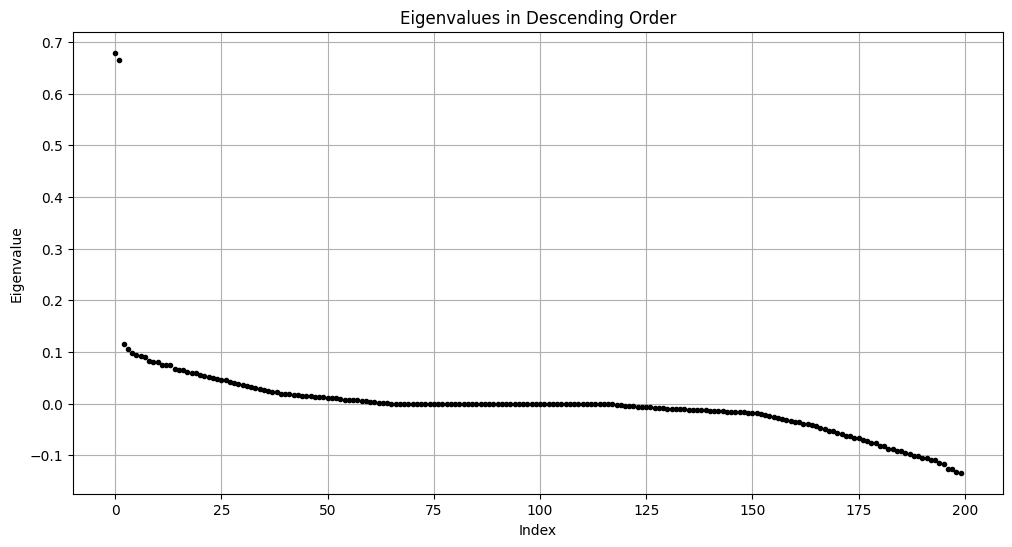

In [3]:
# getting the eigenvalues in descending order
eigvals, eigvecs = np.linalg.eigh(J) 
# Sort indices by descending eigenvalues
idx = np.argsort(-eigvals)
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print(eigvals.shape, eigvecs.shape)


# plotting the eigenvalues
plt.figure(figsize=(12, 6))
plt.plot(eigvals, marker='.', linestyle='', color='k')
plt.title("Eigenvalues in Descending Order")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

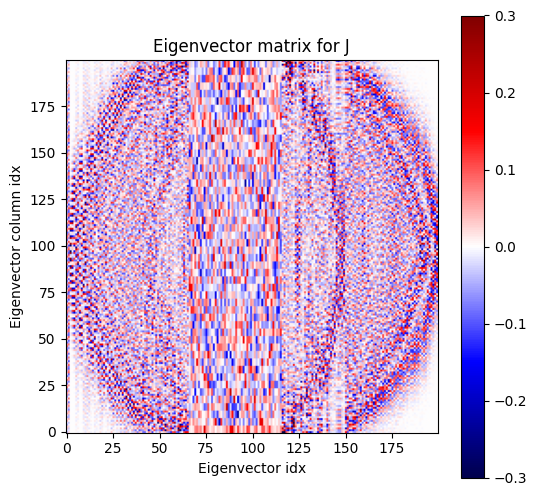

In [4]:
# plotting the eigenvectors corresponding to the descending order eigenvalues

Vmin, Vmax = (-0.3, 0.3)
plt.figure(figsize=(6, 6))
plt.imshow(eigvecs, vmin=Vmin, vmax=Vmax, cmap='seismic', origin='lower')
plt.colorbar()
plt.title('Eigenvector matrix for J')
plt.xlabel('Eigenvector idx')
plt.ylabel('Eigenvector column idx')
plt.show()

In [5]:
# write projected sequences to file
write = False
dir = ''
if write:
    with open(f'{proj_dir}/Data/PCA/Synthetic/Jmtrx_pca.dat', 'w') as f:
        for eigvect in eigvecs.T:
            f.write(f'{Project2Sequence(eigvect)}\n')

/var/folders/ln/x2l_jnxn0t15z0zhfcpgbdt00000gn/T/ipykernel_50793/2694610683.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


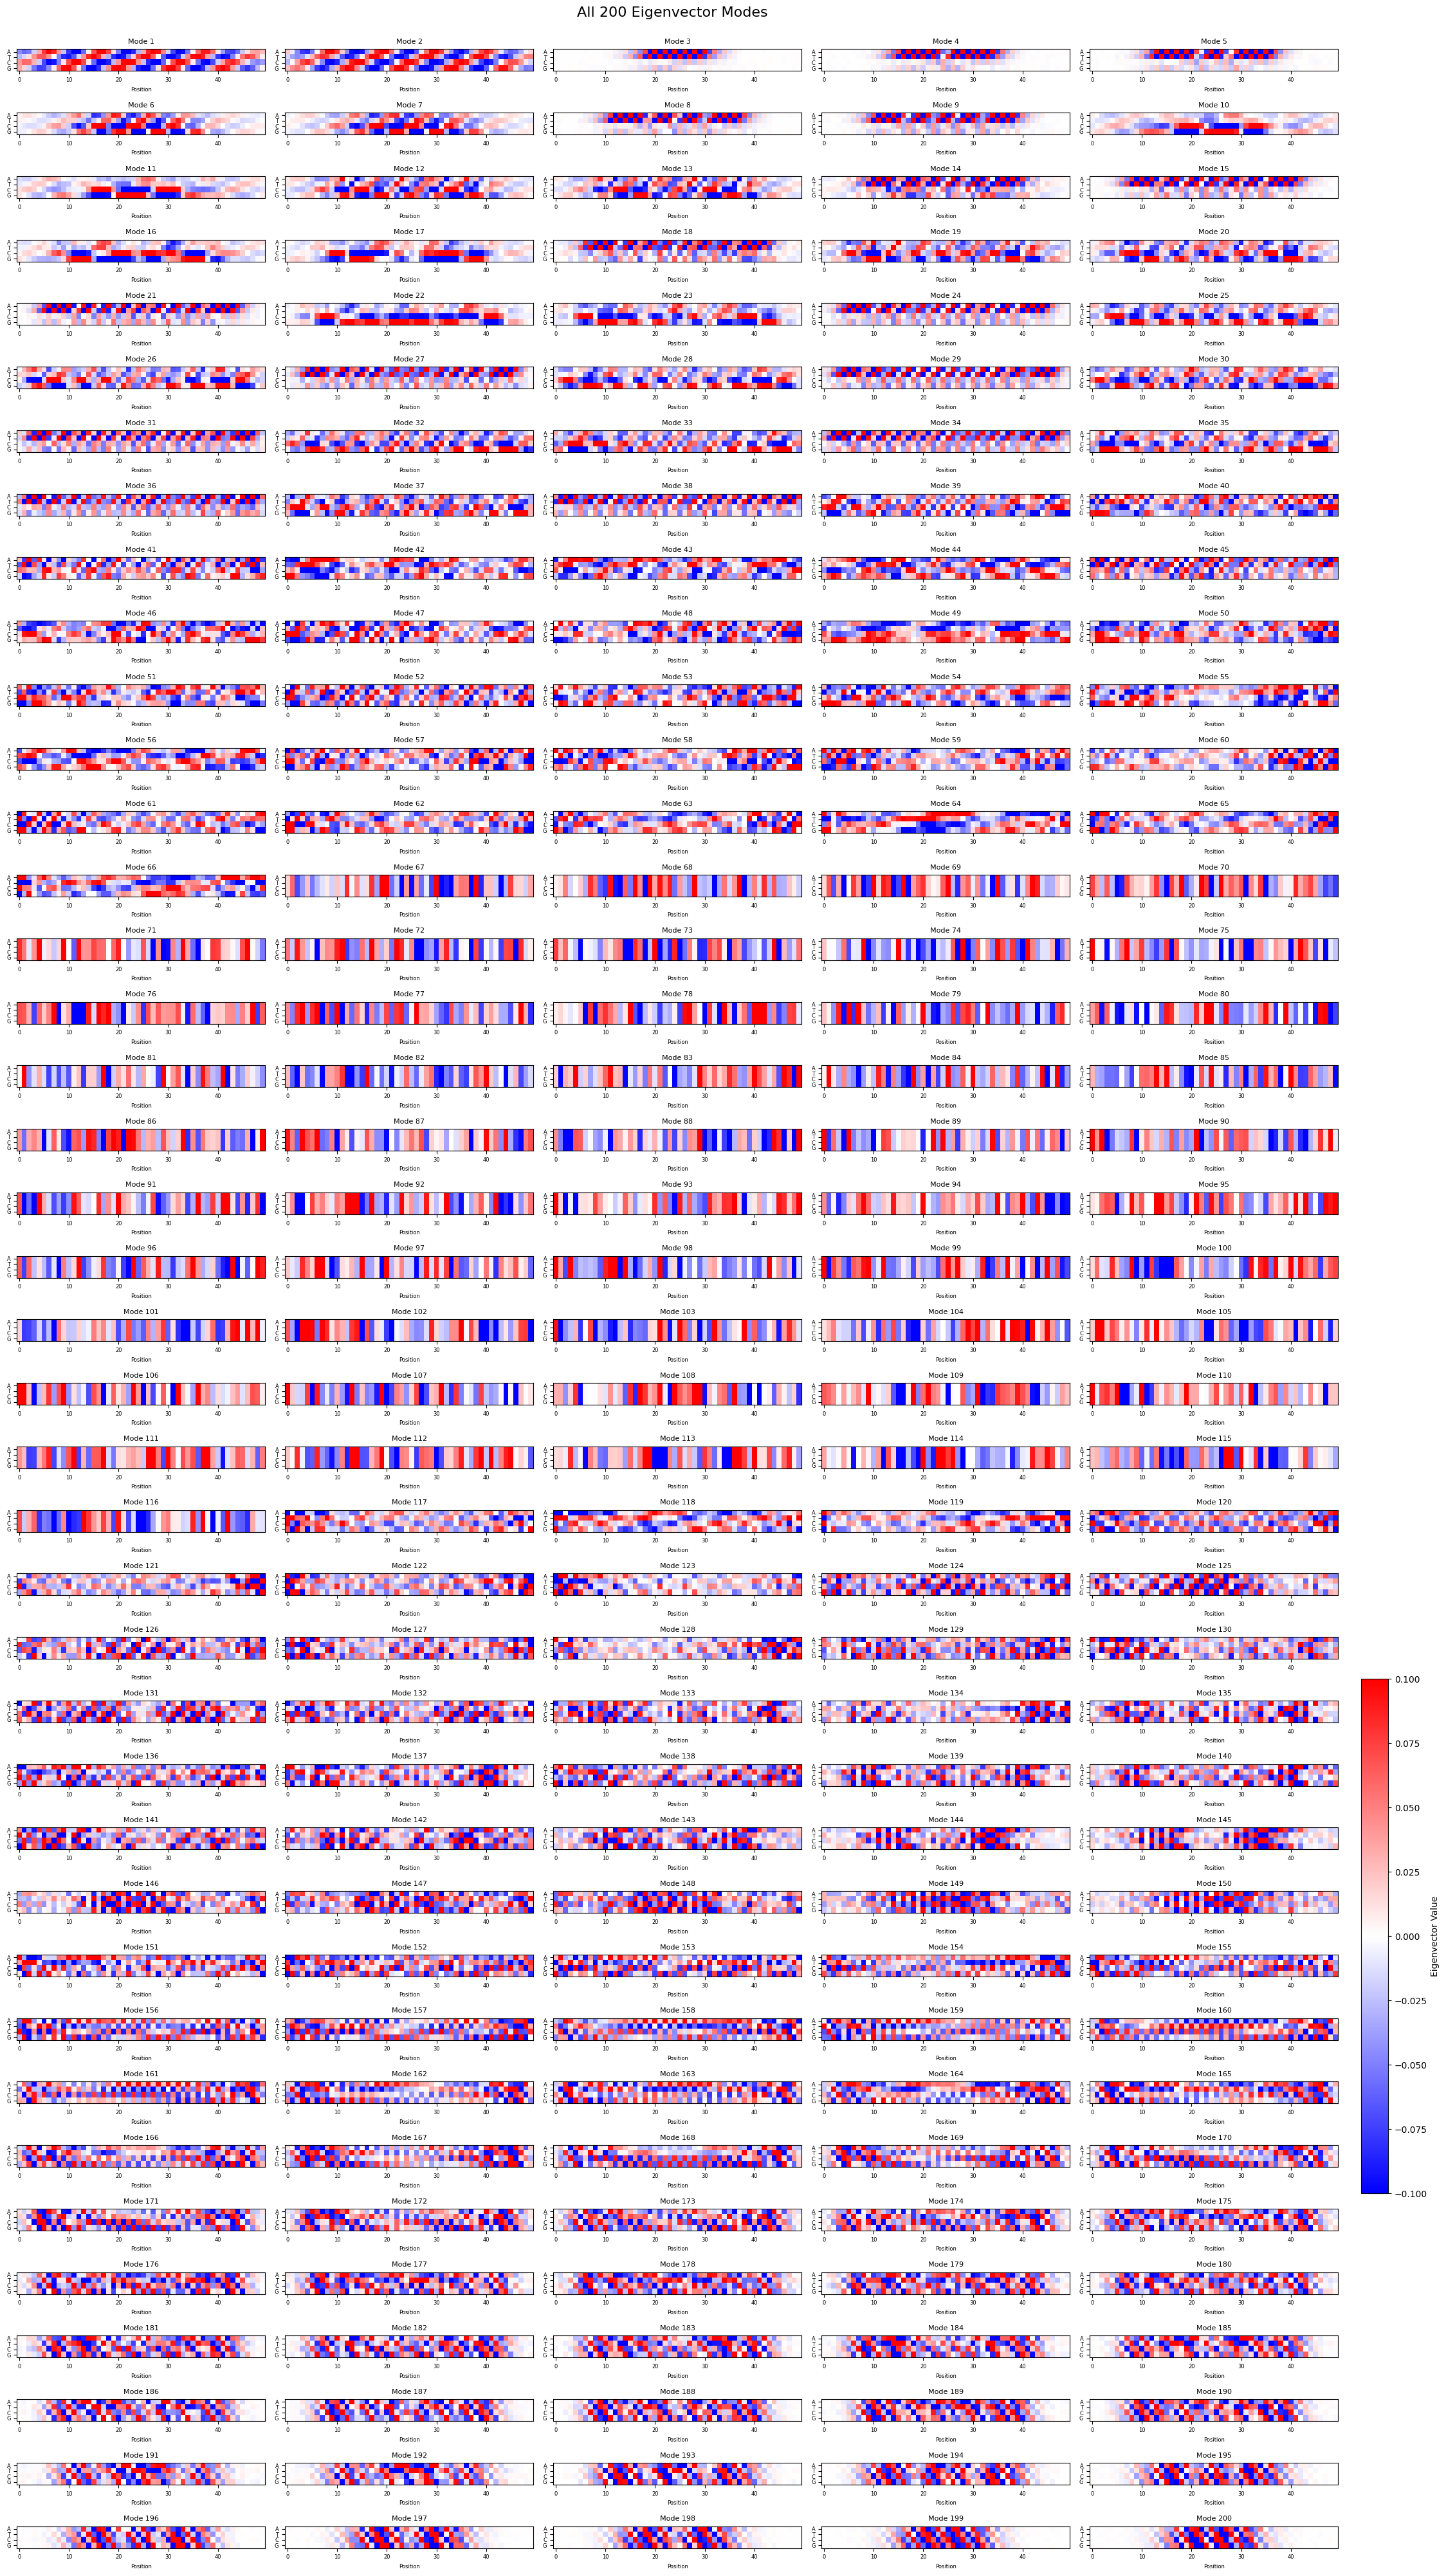

In [6]:
# plotting some of the eigenvectors in 50 x 4 format
# plotting all 200 eigenvector modes in a large plot with 20 x 5 format
bases_order = ['A', 'T', 'C', 'G']
n_modes = 200
n_cols = 5
n_rows = 40

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20+1, 40))
fig.suptitle('All 200 Eigenvector Modes', fontsize=16, y=1.000)

for mode in range(n_modes):
    row = mode // n_cols
    col = mode % n_cols
    
    evect = eigvecs[:, mode]
    mat = evect.reshape(-1, 4)
    
    im = axes[row, col].imshow(
        mat.T,
        cmap='bwr',
        aspect='auto',
        vmin=-1e-1,
        vmax=1e-1,
        interpolation='nearest'
    )
    
    axes[row, col].set_yticks(range(4))
    axes[row, col].set_yticklabels(bases_order)
    axes[row, col].set_title(f"Mode {mode+1}", fontsize=8)
    axes[row, col].set_xlabel("Position", fontsize=6)
    axes[row, col].tick_params(labelsize=6)


cbar_ax = fig.add_axes([1.01, 0.15, 0.02, 0.2])
cbar = fig.colorbar(im, cax=cbar_ax, label='Eigenvector Value')

plt.tight_layout()
plt.show()